In [12]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Clone repo

In [13]:
!git clone https://github.com/kaylode/vnm-ocr-toolbox.git main
%cd main

Cloning into 'main'...
remote: Enumerating objects: 1246, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 1246 (delta 54), reused 58 (delta 37), pack-reused 1166 (from 1)
Receiving objects: 100% (1246/1246), 23.63 MiB | 29.05 MiB/s, done.
Resolving deltas: 100% (622/622), done.
/content/main/main


In [14]:
%cd main
!git checkout master
!git reset --hard HEAD
!git pull

[Errno 2] No such file or directory: 'main'
/content/main/main
Already on 'master'
Your branch is up to date with 'origin/master'.
HEAD is now at ef8744b update dataset link
Already up to date.


# Install dependencies

In [15]:
%%capture
%cd /content/main/
!pip install -r requirements.txt

# Download pretrained weights

In [16]:
!pip install pylsd-nova # Install pylsd-nova instead of pylsd

In [17]:
!pip install shapely # Cài đặt shapely cho đối tượng Polygon

In [18]:
!pip install pyclipper

In [19]:
# ipython-input-15-e8ebebf70510
%cd /content/main
!mkdir "/content/main/weights"

# Di chuyển lệnh import download_pretrained_weights đến đây
from tool.utils import download_pretrained_weights

# Bây giờ gọi download_pretrained_weights
download_pretrained_weights("pan_resnet18_sroie19", cached="/content/main/weights/PANNet_best_map.pth")
download_pretrained_weights("transformerocr_mcocr", cached="/content/main/weights/transformerocr.pth")
download_pretrained_weights("phobert_mcocr", cached="/content/main/weights/phobert_report.pth")

/content/main


Cached downloading...
From (original): https://drive.google.com/uc?id=1-QvIN0MrP28URQILYvLaF1G1eTx2oh8W
From (redirected): https://drive.google.com/uc?id=1-QvIN0MrP28URQILYvLaF1G1eTx2oh8W&confirm=t&uuid=b0028f01-0275-425a-8cdb-eb0752ca2e87
To: /content/main/weights/PANNet_best_map.pth
100%|██████████| 138M/138M [00:02<00:00, 61.4MB/s]
Cached downloading...
From (original): https://drive.google.com/uc?id=1qpXp_-digz2HPTGY_GPdwstzGLhjC_ot
From (redirected): https://drive.google.com/uc?id=1qpXp_-digz2HPTGY_GPdwstzGLhjC_ot&confirm=t&uuid=89d10d0b-d30b-4df8-b320-fa3dd24e8ac3
To: /content/main/weights/transformerocr.pth
100%|██████████| 152M/152M [00:01<00:00, 150MB/s]
Cached downloading...
From (original): https://drive.google.com/uc?id=1v4GQPg4Jx5FWvqJ-2k9YCxEd6iFdlXXa
From (redirected): https://drive.google.com/uc?id=1v4GQPg4Jx5FWvqJ-2k9YCxEd6iFdlXXa&confirm=t&uuid=9a9e8d7b-6216-4570-b23a-65a3f965710e
To: /content/main/weights/phobert_report.pth
100%|██████████| 545M/545M [00:05<00:00, 91

'/content/main/weights/phobert_report.pth'

# Inference

## Inference script

In [27]:
# %cd /content/main
# from IPython.display import Image
# from IPython.display import display



# !python run.py --input=/content/IMG_1175.jpg --output=/content/main/results --do_retrieve --debug --find_best_rotation
# # Sử dụng tên ảnh cố định cho kết quả, ví dụ 'result.jpg'
# img4 = Image("/content/main/results/result.jpg", width=600)

# display(img4)





In [28]:
# %cd /content/main
# from IPython.display import Image
# from IPython.display import display

# IMAGE_ID = "201be0a2fea60af853b7"

# !python run.py --input=/content/"{IMAGE_ID}".jpg --output=/content/main/results/"{IMAGE_ID}" --do_retrieve --debug --find_best_rotation

# img1 = Image(f"/content/main/data/mcocr/images/val/{IMAGE_ID}.jpg", width=600)
# img2 = Image(f"/content/main/results/{IMAGE_ID}/cache/preprocessed.jpg", width=600)
# img3 = Image(f"/content/main/results/{IMAGE_ID}/cache/detected.jpg", width=600)
# img4 = Image(f"/content/main/results/{IMAGE_ID}/result.jpg", width=600)

# display(img1,img2,img3,img4)

## Inference modules on Personal ID

In [62]:
%cd /content/main
import os
import cv2
import re
import pandas as pd
from modules import Preprocess, Detection, OCR, Correction
from tool.utils import natural_keys, visualize
import time
import matplotlib.pyplot as plt

/content/main


In [63]:
# Define some variables
img_id = "IMG_1175"

det_weight = None
ocr_weight = None

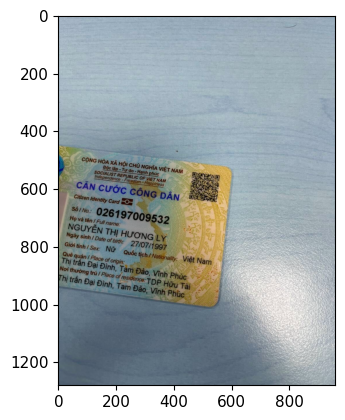

In [64]:
# Read image
img = cv2.imread(f"/content/{img_id}.jpg")

plt.imshow(img)
plt.show()

In [50]:
import inspect
print(inspect.getfile(Detection))

/content/main/modules/__init__.py


In [67]:
# Initialize modules with updated parameters
det_model = Detection(config_path='tool/config/detection/configs.yaml', weight_path=det_weight)
ocr_model = OCR(weight_path=ocr_weight)  # Giả sử lớp OCR không thay đổi
preproc = Preprocess(
    det_model=det_model,
    ocr_model=ocr_model,
    find_best_rotation=False
)
correction = Correction()


File exists: .cache/pan_resnet18_default.pth


load pretrained models from imagenet


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [66]:
# # Initialize modules
# det_model = Detection(weight_path=det_weight)
# ocr_model = OCR(weight_path=ocr_weight)
# preproc = Preprocess(
#     det_model=det_model,
#     ocr_model=ocr_model,
#     find_best_rotation=False)
# correction = Correction()

File exists: .cache/pan_resnet18_default.pth


load pretrained models from imagenet


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [ ]:
# Preprocess image

img1 = preproc(img)

plt.imshow(img1)
plt.show()

In [ ]:
# Detect texts

boxes, img2  = det_model(
    img1,
    crop_region=True,                               #Crop detected regions for OCR
    return_result=True,                             # Return plotted result
    output_path=f"/content/main/results/{img_id}"   #Path to save cropped regions
)

plt.imshow(img2)
plt.show()

In [ ]:
# Text OCR

img_paths=os.listdir(f"/content/main/results/{img_id}/crops") # Cropped regions
img_paths.sort(key=natural_keys)
img_paths = [os.path.join(f"/content/main/results/{img_id}/crops", i) for i in img_paths]

texts, probs = ocr_model.predict_folder(img_paths, return_probs=True) # OCR
texts = correction(texts)   # Word correction

for i in texts:
    print(i)

In [ ]:
preds, probs = None, None
visualize(
    img1, boxes, texts,
    img_name = f'/content/main/results/{img_id}/result.jpg',
    class_mapping=class_mapping,
    labels = preds, probs = probs,
    visualize_best=False)


from IPython.display import Image
from IPython.display import display

img = Image(f"/content/main/results/{img_id}/result.jpg", width=600)
display(img)

In [ ]:
preds, probs = None, None
visualize(
    img1, boxes, texts,
    img_name = f'/content/main/results/{img_id}/result.jpg',
    class_mapping=class_mapping,
    labels = preds, probs = probs,
    visualize_best=False)

end = time.time()
print(f"Executed in {end-start} s")

In [ ]:
!rm -rf ".cache"

## Inference modules on Invoice

In [ ]:
%cd /content/main
import os
import cv2
import re
import pandas as pd
from modules import Preprocess, Detection, OCR, Retrieval, Correction
from tool.utils import natural_keys, visualize
import time
import matplotlib.pyplot as plt

In [ ]:
# Define some auxiliary functions

def find_highest_score_each_class(labels, probs):
        best_score = [0] * (len(class_mapping.keys())-1)
        best_idx = [-1] * (len(class_mapping.keys())-1)
        for i, (label, prob) in enumerate(zip(labels, probs)):
            label_idx = class_mapping[label]
            if label_idx != class_mapping["NONE"]:
                if prob > best_score[label_idx]:
                    best_score[label_idx] = prob
                    best_idx[label_idx] = i
        return best_idx

def find_total_cost_value(total_cost_idx, boxes):
    total_cost_box = boxes[total_cost_idx]
    x1,y1 = total_cost_box[0]
    for i in range(total_cost_idx+1, len(boxes)):
        x1_,y1_ = boxes[i][0]

        if abs(x1-x1_) < 2:
          return i-1


def extract_timestamp(text):
    x = re.findall(r'\d{2}:\d{2}|\d{2}:\d{2}:\d{2}|\d{2}-\d{2}-\d{2}|\d{2}\.\d{2}\.\d{2}|\d+/\d+/\d+', text)
    return ' '.join(x)

In [ ]:
# Define some variables
img_id = "mcocr_val_145115bxsnt"
class_mapping = {"SELLER":0, "ADDRESS":1, "TIMESTAMP":2, "TOTAL_COST":3, "NONE":4}
idx_mapping = {0:"SELLER", 1:"ADDRESS", 2:"TIMESTAMP", 3:"TOTAL_COST", 4:"NONE"}

det_weight = "/content/drive/MyDrive/AI Competitions/MC-OCR/checkpoints/detection-checkpoints/best_rotation/PANNet_best_map.pth"
ocr_weight = "/content/drive/MyDrive/AI Competitions/MC-OCR/checkpoints/ocr-checkpoints/transformerocr.pth"

In [ ]:
# Read image
img = cv2.imread(f"/content/main/data/mcocr/images/val/{img_id}.jpg")

plt.imshow(img)
plt.show()

In [ ]:
# Initialize modules

det_model = Detection(weight_path=det_weight)
ocr_model = OCR(weight_path=ocr_weight)
preproc = Preprocess(
    det_model=det_model,
    ocr_model=ocr_model,
    find_best_rotation=False)
retrieval = Retrieval(class_mapping, mode = 'all')
correction = Correction()

In [ ]:
# Preprocess image

img1 = preproc(img)

plt.imshow(img1)
plt.show()

In [ ]:
# Detect texts

boxes, img2  = det_model(
    img1,
    crop_region=True,                               #Crop detected regions for OCR
    return_result=True,                             # Return plotted result
    output_path=f"/content/main/results/{img_id}"   #Path to save cropped regions
)

plt.imshow(img2)
plt.show()

In [ ]:
# Text OCR

img_paths=os.listdir(f"/content/main/results/{img_id}/crops") # Cropped regions
img_paths.sort(key=natural_keys)
img_paths = [os.path.join(f"/content/main/results/{img_id}/crops", i) for i in img_paths]

texts, probs = ocr_model.predict_folder(img_paths, return_probs=True) # OCR
texts = correction(texts)   # Word correction

for i in texts:
    print(i)

In [ ]:
preds, probs = retrieval(texts)

# Custom post-process
best_score_idx = find_highest_score_each_class(preds, probs)
value_idx = find_total_cost_value(best_score_idx[3], boxes)
if value_idx != best_score_idx[3]:
    texts[best_score_idx[3]] += (" " + texts[value_idx])

texts[best_score_idx[2]] = extract_timestamp(texts[best_score_idx[2]])

# Visualize and save result
visualize(
    img1, boxes, texts,
    img_name = f'/content/main/results/{img_id}/result.jpg',
    class_mapping=class_mapping,
    labels = preds, probs = probs,
    visualize_best=True)

with open(f"/content/main/results/{img_id}/result.txt", 'w') as f:
    for cls, idx in enumerate(best_score_idx):
        f.write(f"{idx_mapping[cls]} : {texts[idx]}\n")

from IPython.display import Image
from IPython.display import display

img = Image(f"/content/main/results/{img_id}/result.jpg", width=600)
display(img)